***Descargando las librerías***




In [ ]:
!pip install seaborn --upgrade
!pip install -U plotly
!pip install -U kaleido

     |████████████████████████████████| 23.9 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 79.9 MB 101 kB/s 


In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
banco = pd.read_csv('/content/bank-additional-full.csv', sep = ';')
banco.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


No tenemos variables con campos vacíos.

In [ ]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
banco.isna().sum().sort_values()

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

Para un mejor entendimiento de las variables cambiaremos sus nombres.

In [ ]:
banco2 = banco.rename(columns = {'age':'Edad', 'job':'Activ_económica', 'marital':'Estado_civil', 'education':'Nivel_educativo', 'default':'Mora_actual',
                                 'housing':'Créd_vivienda','loan':'Créd_personal', 'contact':'Medio_contacto', 'month':'Mes_contacto', 'day_of_week':'Día_contacto',
                                 'duration':'Duración_últcontacto', 'campaign':'Contactos_vigente', 'pdays':'Días_últcontacto', 'previous':'Contactos_anterior',
                                 'poutcome':'Resultado_anterior', 'emp.var.rate':'Var_empleo', 'cons.price.idx':'Indice_precios','cons.conf.idx':'Indice_confianza',
                                 'euribor3m':'Euribor3m', 'nr.employed':'Nro_Empleados', 'y':'Acepta_CDT'})
banco2.head()

,Edad,Activ_económica,Estado_civil,Nivel_educativo,Mora_actual,Créd_vivienda,Créd_personal,Medio_contacto,Mes_contacto,Día_contacto,Duración_últcontacto,Contactos_vigente,Días_últcontacto,Contactos_anterior,Resultado_anterior,Var_empleo,Indice_precios,Indice_confianza,Euribor3m,Nro_Empleados,Acepta_CDT
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Variables cuantitativas**

Observamos los estadísticos descriptivos de las variables numéricas.


In [ ]:
banco2.describe()

,Edad,Duración_últcontacto,Contactos_vigente,Días_últcontacto,Contactos_anterior,Var_empleo,Indice_precios,Indice_confianza,Euribor3m,Nro_Empleados
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


*   Edad: El promedio de edad de la base es de 40 años, se observa un mínimo de 17 años y un máximo de 98 años. Revisaremos la distribución de esta variable para validar si son datos atípicos.

>Análisis: Los valores atípicos para esta variable son tolerables, teniendo en cuenta que solo se tienen 5 registros de personas menores de 18 años. De igual forma, teniendo en cuenta la esperanza de vida en los países europeos, es normal tener 10 registros de personas mayores de 90 años.

In [ ]:
Menor_18 = (banco2.Edad<18).value_counts()
Menor_18

False    41183
True         5
Name: Edad, dtype: int64

In [ ]:
Mayor_90 = (banco2.Edad>90).value_counts()
Mayor_90

False    41178
True        10
Name: Edad, dtype: int64

*   Duración_últcontacto: El promedio es de 4,3 minutos con una variación muy alta. El contacto que más tiempo duró fue de 82 minutos. Revisaremos la distribución de esta varible para validar si estos datos son frecuentes.

>Análisis: La cantidad de registros con valores atípicos para esta variable son mínimos (Duración igual a 0 min o Duración mayor a 30 min), por lo cual no es necesario retirarlos de la base.

In [ ]:
DurUltContIgual0 = (banco2.Duración_últcontacto==0).value_counts()
DurUltContIgual0

False    41184
True         4
Name: Duración_últcontacto, dtype: int64

In [ ]:
DurUltContMayor30 = (banco2.Duración_últcontacto>3600).value_counts()
DurUltContMayor30

False    41183
True         5
Name: Duración_últcontacto, dtype: int64

*   Contactos_vigente: Por lo menos en la última campaña se ha realizado un intento de contadto a los clientes. El promedio es aproximadamente 3 contactos. Revisaremos la distribución para validar valores atípicos como el máximo de 56 llamadas.

>Análisis: El número de contactos de la última campaña que superan las 20 llamadas (1 llamada por día hábil mes) no es representativa, por lo cual no es necesario eliminarlo de la base.

In [ ]:
ContVigenteMayor20 = (banco2.Contactos_vigente>20).value_counts()
ContVigenteMayor20

False    41031
True       157
Name: Contactos_vigente, dtype: int64

*   Días_últcontacto: Los valores de la mayoría de cuantiles corresponden a 999, lo cual implica que no ha habido un contacto reciente. Evaluaremos la variable definir si se mantiene en el dataset.

>Análisis: El número de casos que corresponden a la descripción 999 representan el 96,3% de la base. Este resultado hace que podamos descartar esta variable del dataset, ya que no va a discriminar la población.

In [ ]:
DiasUltContactoIgual999 = (banco2.Días_últcontacto==999).value_counts()
DiasUltContactoIgual999

True     39673
False     1515
Name: Días_últcontacto, dtype: int64

*   Contactos_anterior: Los valores de la mayoría de cuantiles corresponden a 0, lo cual indica que la mayoría de clientes de esta base no fueron contactados en la campaña anterior. Evaluaremos la variable definir si se mantiene en el dataset.

>Análisis: El número de casos que corresponden a la descripción 0 representan el 86,3% de la base. Este resultado hace que podamos descartar esta variable del dataset, ya que no va a discriminar la población.

In [ ]:
ContAnteriorIgual0 = (banco2.Contactos_anterior==0).value_counts()
ContAnteriorIgual0

True     35563
False     5625
Name: Contactos_anterior, dtype: int64

*   Variables de mercado: Como estos índices son constantes durante un períod (mes o trimestre) no vale la pena evaluar su variación por el momento.

***Análisis gráfico***


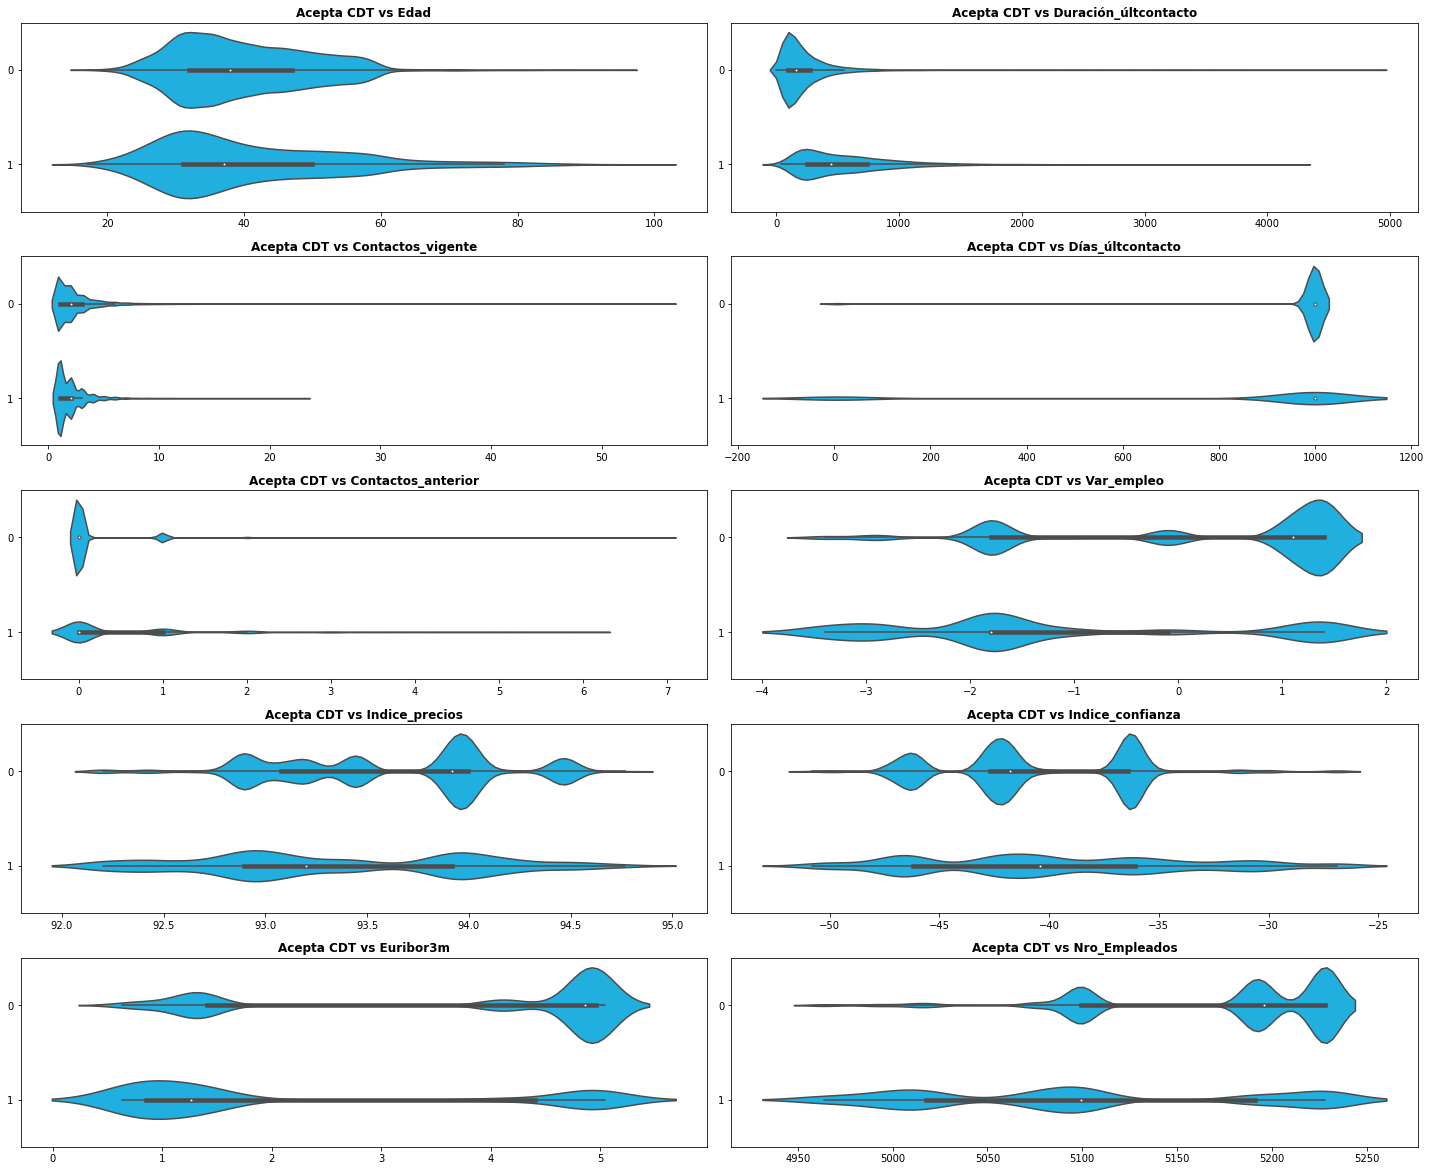

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 16))
axes = axes.flat
columnas_object = banco2.select_dtypes('number').columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'Acepta_CDT',
        data  = banco2,
        color = "deepskyblue",
        ax    = axes[i]
    )
    axes[i].set_title(f"Acepta CDT vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=1);

***Análisis de correlaciones***

Después de confirmar gráficamente cuáles son las variables numéricas a eliminar del análisis, realizamos el mapa de correlaciones para validar posibles relaciones positivas o negativas existentes entre las variables. Para este análisis se incluyen las variables de mercado.

< Análisis: Validando el gráfico de correlaciones se encuentra que la siguientes variables están relacionadas con magnitud positiva:

*   Var_Empleo y Euribor3m: 0.97
*   Var_Empleo y Nro_Empleados: 0.91
*   Euribor3m y Nro_Empleados: 0.95

Es normal que estás variables estén relacionadas ya que son indicadores macroeconómicos que dependen unos de otros. Si hay empleo, hay flujo de dinero, por tanto hay más demanda de producto y por tanto de crédito; lo cual se aprovecha para aumentar la tasa de interés interbancaria y, en consecuencia, la tasa de interés al consumidor.

Para este caso, y por tener una relación más directa con la decisión de si el cliente acepta o no el CDT (de acuerdo a lo visto gráficamente), se dejará como variable de estudio Euribor3m.


*   Euribor3m e Indice_precios: 0.69
*   Var_Empleo e Indice_precios: 0.78

En este caso, y de acuerdo a lo explicado anteriormente, al tener también una correlación positiva con Euribor3m, se eliminará la variable Indice_precios.



In [ ]:
banco3 = banco2.drop(columns=['Duración_últcontacto','Contactos_vigente'])
banco3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                41188 non-null  int64  
 1   Activ_económica     41188 non-null  object 
 2   Estado_civil        41188 non-null  object 
 3   Nivel_educativo     41188 non-null  object 
 4   Mora_actual         41188 non-null  object 
 5   Créd_vivienda       41188 non-null  object 
 6   Créd_personal       41188 non-null  object 
 7   Medio_contacto      41188 non-null  object 
 8   Mes_contacto        41188 non-null  object 
 9   Día_contacto        41188 non-null  object 
 10  Días_últcontacto    41188 non-null  int64  
 11  Contactos_anterior  41188 non-null  int64  
 12  Resultado_anterior  41188 non-null  object 
 13  Var_empleo          41188 non-null  float64
 14  Indice_precios      41188 non-null  float64
 15  Indice_confianza    41188 non-null  float64
 16  Euri

In [ ]:
banco3.corr()

,Edad,Días_últcontacto,Contactos_anterior,Var_empleo,Indice_precios,Indice_confianza,Euribor3m,Nro_Empleados
Edad,1.000000,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
Días_últcontacto,-0.034369,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
Contactos_anterior,0.024365,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
Var_empleo,-0.000371,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
Indice_precios,0.000857,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
Indice_confianza,0.129372,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
Euribor3m,0.010767,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
Nro_Empleados,-0.017725,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


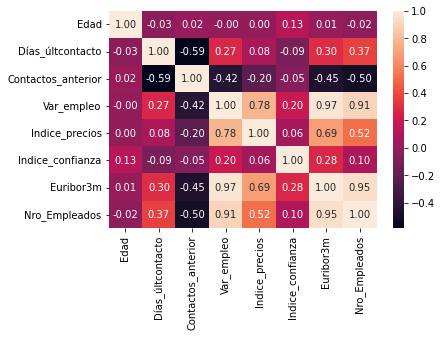

In [ ]:
sns.heatmap(banco3.corr(), annot=True, fmt=r'.2f')

### **Variables cualitativas**

Observamos los estadísticos descriptivos de las variables cualitativas.

In [ ]:
banco2.select_dtypes(include=['object']).describe()

,Activ_económica,Estado_civil,Nivel_educativo,Mora_actual,Créd_vivienda,Créd_personal,Medio_contacto,Mes_contacto,Día_contacto,Resultado_anterior,Acepta_CDT
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


***Análisis gráfico***

A continuación algunas conclusiones generales de la población objeto de la campaña.



*   Aceptación CDT: De los contactados (41.188 clientes), solo un poco más del 12% acepta el producto ofrecido.
*   Activ_económica: Las actividades de mayor participación son las administrativas, operativas y técnicas.
*   Estado_civil: Un poco más del 50% de la población es casada.
*   Nivel _educativo: La mitad de la población se ubica entre universitarios y bachilleres.
*   Mora_actual: A pesar de que la mayoría de la población tiene un indicador positivo en cartera, el nivel de despoblamiento de la variable es alto. Por lo cual se puede considerar su eliminación del análisis.
*   Créd_vivienda: La mayoría de los contactados tiene crédito de vivienda.
*   Créd_personal: La mayoría de los contactados no tiene este crédito personal.
*   Medio_contacto: La mayoría fue contactada a través del número celular.
*   Mes_contacto: Al parecer la mayor parte de la campaña se llevó a cabo en el mes de mayo.
*   Día_contacto: Todos los días de la semana el número de contactos es muy similar.
*   Resultado anterior: La mayoría de personas no tenía un resultado previo, lo que nos lleva a pensar que son campañas de primera vez.








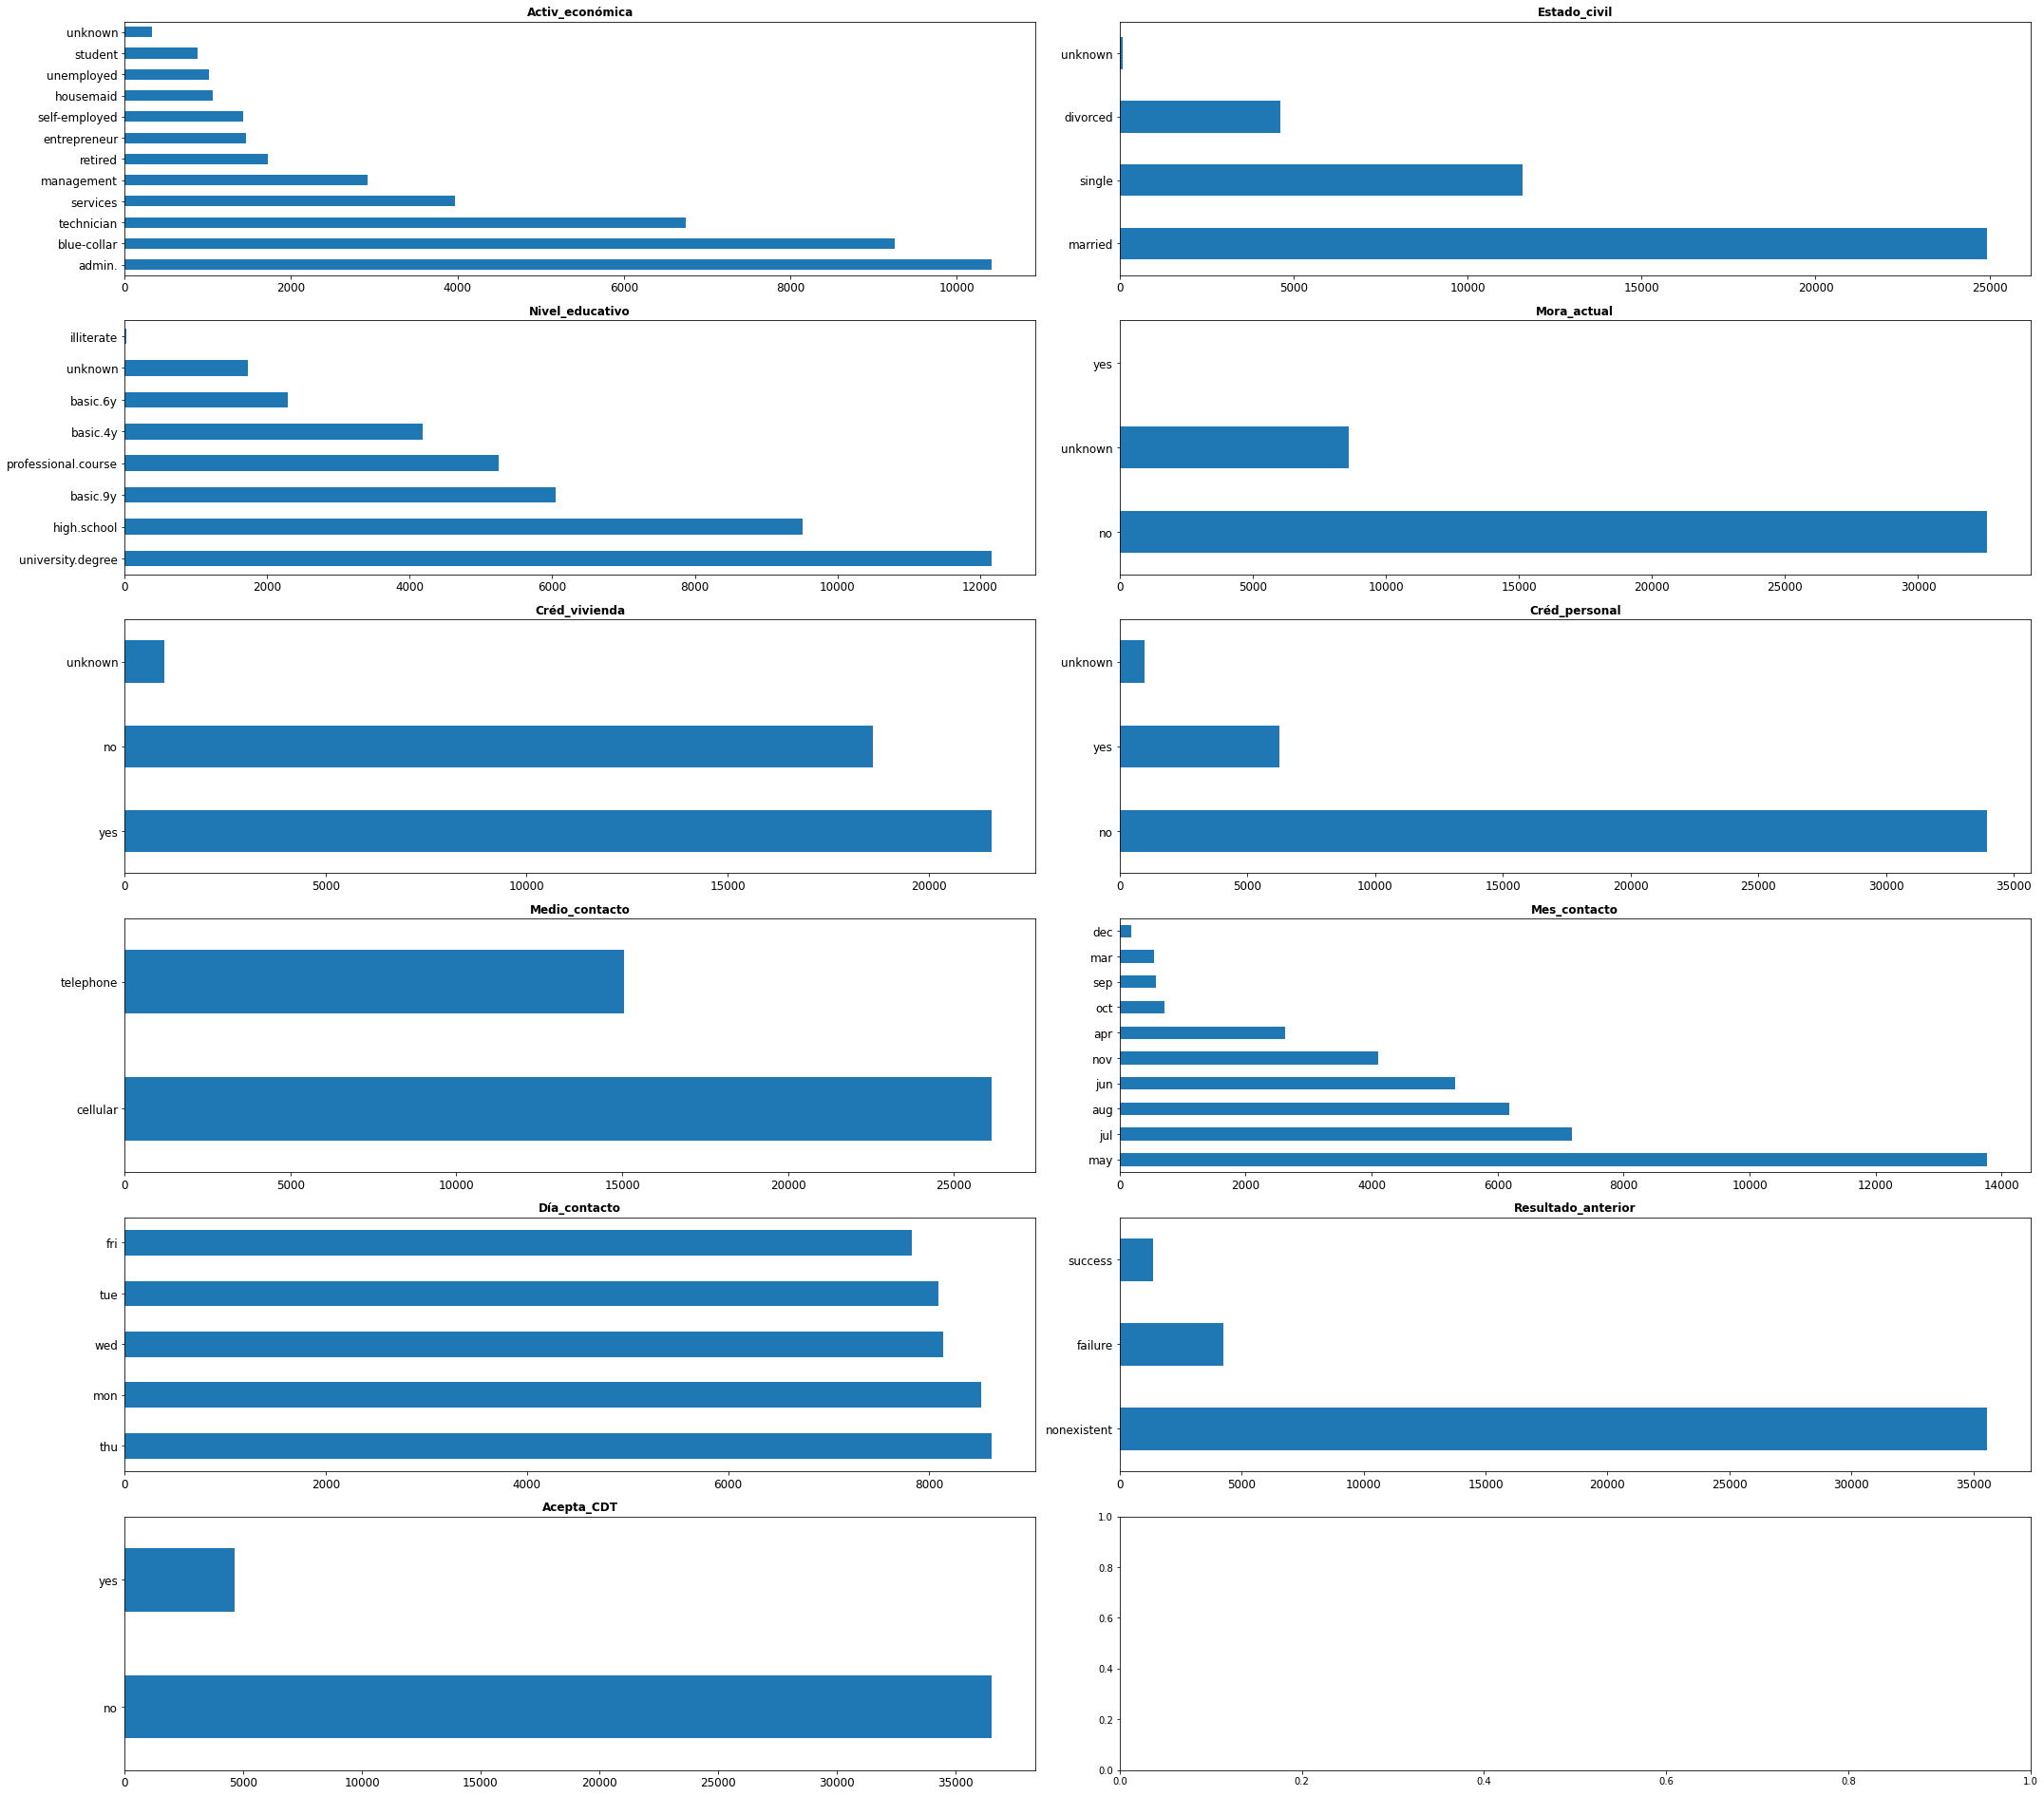

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 26))
axes = axes.flat
columnas_object2 = banco3.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object2):
    banco3[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=1)